In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Define the deep learning model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [6]:
# Function to train and evaluate the model
def train_and_evaluate_model(batch_size, input_size):
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))

    # Plot the training and validation accuracy over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

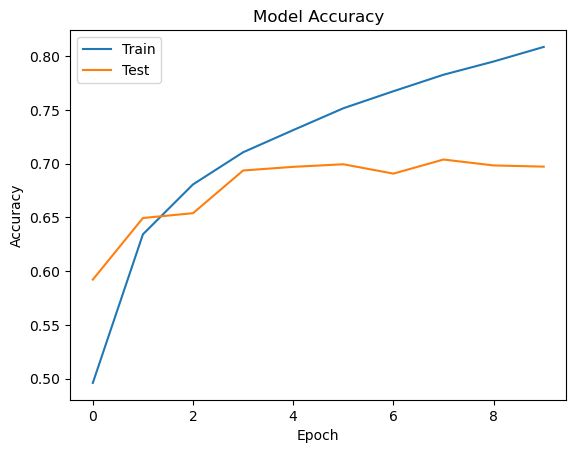

In [7]:

# Experiment with different batch sizes and image input sizes
batch_sizes = [16, 32, 64, 128]
image_input_sizes = [(32, 32), (64, 64), (128, 128)]

for batch_size in batch_sizes:
    for input_size in image_input_sizes:
        train_and_evaluate_model(batch_size, input_size)
        break
    break

## Explanation of the Project

1.The code begins by importing the necessary libraries and modules for the experiment, including TensorFlow and Keras.

2.The CIFAR-10 dataset is loaded using the cifar10.load_data() function. It consists of 50,000 training images and 10,000 testing images,  classified into 10 different categories.

3.The pixel values of the images are normalized between 0 and 1 by dividing them by 255. This is done to ensure that the input values are within a suitable range for the deep learning model.

4.The class labels are converted into one-hot encoded vectors using the keras.utils.to_categorical() function. This transformation is  necessary to represent the class labels in a suitable format for training the model.

5.The create_model() function defines the architecture of the deep learning model. It uses the Sequential model from Keras and adds convolutional and pooling layers, followed by fully connected layers. The final layer uses the softmax activation function to output class probabilities.

6.The train_and_evaluate_model() function takes a batch size and an input size as arguments. Inside the function, a model is created using  the create_model() function. The model is compiled with the Adam optimizer and categorical cross-entropy loss. The summary of the model is  displayed.

7.The model is trained using the fit() function, passing the training data, batch size, and the number of epochs. The validation data (test set) is also provided to monitor the model's performance during training.

8.After training, the function plots the training and validation accuracy over epochs using Matplotlib.

9.The main part of the code sets up the experiments to be conducted. It defines a list of batch sizes and a list of image input sizes to iterate over.

10.It then iterates over the batch sizes and image input sizes using nested loops. For each combination, the train_and_evaluate_model()  function is called, passing the current batch size and image input size. The break statements ensure that only a single combination is evaluated.


This code allows you to experiment with different batch sizes and image input sizes for the CIFAR-10 dataset. It trains and evaluates a deep learning model for each combination and plots the accuracy results. By modifying the lists of batch sizes and image input sizes, you can explore how these parameters impact the performance of the model.

## Expalanation On Batch Size & Image Input size In DeepLearning

The batch size and image input size are important parameters in deep learning models that can significantly impact model training and performance.

Batch Size:

Batch size refers to the number of samples processed by the model in each training iteration.

The batch size determines how many training samples are used before updating the model's weights.

Larger batch sizes can make better use of hardware acceleration, such as GPUs, and can lead to faster training times.

Smaller batch sizes provide more frequent updates to the model's weights and can potentially lead to better convergence.

However, larger batch sizes may require more memory, so it's essential to consider the available resources when choosing the batch size.

The optimal batch size can vary depending on the dataset and the model architecture, and it is often determined through experimentation.

Larger batch sizes generally result in more stable gradients, but they may sacrifice some generalization performance compared to smaller batch sizes.

Image Input Size:

The image input size refers to the dimensions (width and height) of the input images provided to the model.

Deep learning models typically expect images of a fixed size as input.

The image input size directly affects the model's architecture, as the input layer's shape is defined based on the image dimensions.

The image input size should be chosen based on the characteristics of the dataset and the model's requirements.

Larger image input sizes can capture more details and potentially lead to better performance but require more computational resources and memory.

Smaller image input sizes may result in faster training and inference times but can also lead to loss of important details.

It is important to consider the trade-off between performance and resource constraints when choosing the image input size.

In some cases, images may need to be resized or cropped to fit the desired input size, which can impact the data and introduce some distortions.

Example:

Let's consider the task of image classification on the CIFAR-10 dataset, which consists of 50,000 training images and 10,000 test images of size 32x32 pixels.


Batch Size:

If we set the batch size to 32, it means that the model will process 32 images in each training iteration.
With a larger batch size, such as 128, the model will process more images in each iteration, potentially leading to faster training.
However, larger batch sizes may require more memory, and if the available memory is limited, a smaller batch size might be necessary.
Experimentation can help determine the optimal batch size for the specific dataset and model architecture.


Image Input Size:

The CIFAR-10 dataset images have a size of 32x32 pixels.
If we decide to resize the images to 224x224 pixels, we are increasing the image input size.
The larger input size can capture more details from the images, potentially improving the model's performance.
However, resizing the images also introduces some distortions and may increase the computational and memory requirements.
Alternatively, we could choose to work with the original image size of 32x32 pixels, which may lead to faster training and inference but could potentially lose some details present in the larger images.


In summary, the batch size and image input size are important parameters that need to be carefully chosen based on the available resources, model requirements, and dataset characteristics. Experimentation and evaluation of different settings can help determine the optimal values for these parameters.